In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('./X_train.csv')
y_train = pd.read_csv('./y_train.csv')
X_test = pd.read_csv('./X_test.csv')
y_test = pd.read_csv('./y_test.csv')

In [3]:
%store -r class_weight
%store -r X_train_SMOTE
%store -r y_train_SMOTE

In [4]:
X_train = pd.DataFrame(X_train.iloc[:, :-1], columns=X_train.columns[:-1])
X_test = pd.DataFrame(X_test.iloc[:, :-1], columns=X_test.columns[:-1])
y_train = y_train['Tip']
y_test = y_test['Tip']
X_train_SMOTE = pd.DataFrame(X_train_SMOTE.iloc[:, :-1], columns=X_train_SMOTE.columns[:-1])

In [7]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(clf_rf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf_rf = RandomForestClassifier(random_state=42, **best_params)
best_clf_rf.fit(X_train, y_train)

y_pred_rf = best_clf_rf.predict(X_test)
feature_importance = best_clf_rf.feature_importances_

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("\nNajbolji parametri:", best_params)
print("Preciznost modela sa najboljim parametrima:", round(accuracy_rf, 5))
print("\nIzvestaj o klasifikaciji:\n", classification_report_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.828 total time=   0.3s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.803 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.3s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.851 total time=   0.3s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.818 total time=   0.3s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.836 total time=   0.7s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.787 total time=   0.7s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.876 to

In [8]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(clf_rf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train_SMOTE, y_train_SMOTE)

best_params = grid_search.best_params_

best_clf_rf = RandomForestClassifier(random_state=42, **best_params)
best_clf_rf.fit(X_train_SMOTE, y_train_SMOTE)

y_pred_rf = best_clf_rf.predict(X_test)
feature_importance = best_clf_rf.feature_importances_

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("\nNajbolji parametri:", best_params)
print("Preciznost modela sa najboljim parametrima:", round(accuracy_rf, 5))
print("\nIzvestaj o klasifikaciji:\n", classification_report_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.917 total time=   0.9s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.932 total time=   0.9s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.947 total time=   0.9s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.959 total time=   0.9s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.932 total time=   1.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.917 total time=   1.9s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.929 total time=   2.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.950 to

In [9]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [class_weight]
}

clf_rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(clf_rf, param_grid, cv=5, scoring='accuracy', verbose=4)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_clf_rf = RandomForestClassifier(random_state=42, **best_params)
best_clf_rf.fit(X_train, y_train)

y_pred_rf = best_clf_rf.predict(X_test)
feature_importance = best_clf_rf.feature_importances_

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("\nNajbolji parametri:", best_params)
print("Preciznost modela sa najboljim parametrima:", round(accuracy_rf, 5))
print("\nIzvestaj o klasifikaciji:\n", classification_report_rf)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END class_weight={'C': 0.04142011834319527, 'N': 0.12727272727272726, 'R': 0.18666666666666668, 'K': 0.2, 'P': 1}, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.811 total time=   0.3s
[CV 2/5] END class_weight={'C': 0.04142011834319527, 'N': 0.12727272727272726, 'R': 0.18666666666666668, 'K': 0.2, 'P': 1}, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.811 total time=   0.2s
[CV 3/5] END class_weight={'C': 0.04142011834319527, 'N': 0.12727272727272726, 'R': 0.18666666666666668, 'K': 0.2, 'P': 1}, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.868 total time=   0.3s
[CV 4/5] END class_weight={'C': 0.04142011834319527, 'N': 0.12727272727272726, 'R': 0.18666666666666668, 'K': 0.2, 'P': 1}, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.3s
[CV 5/5] END class

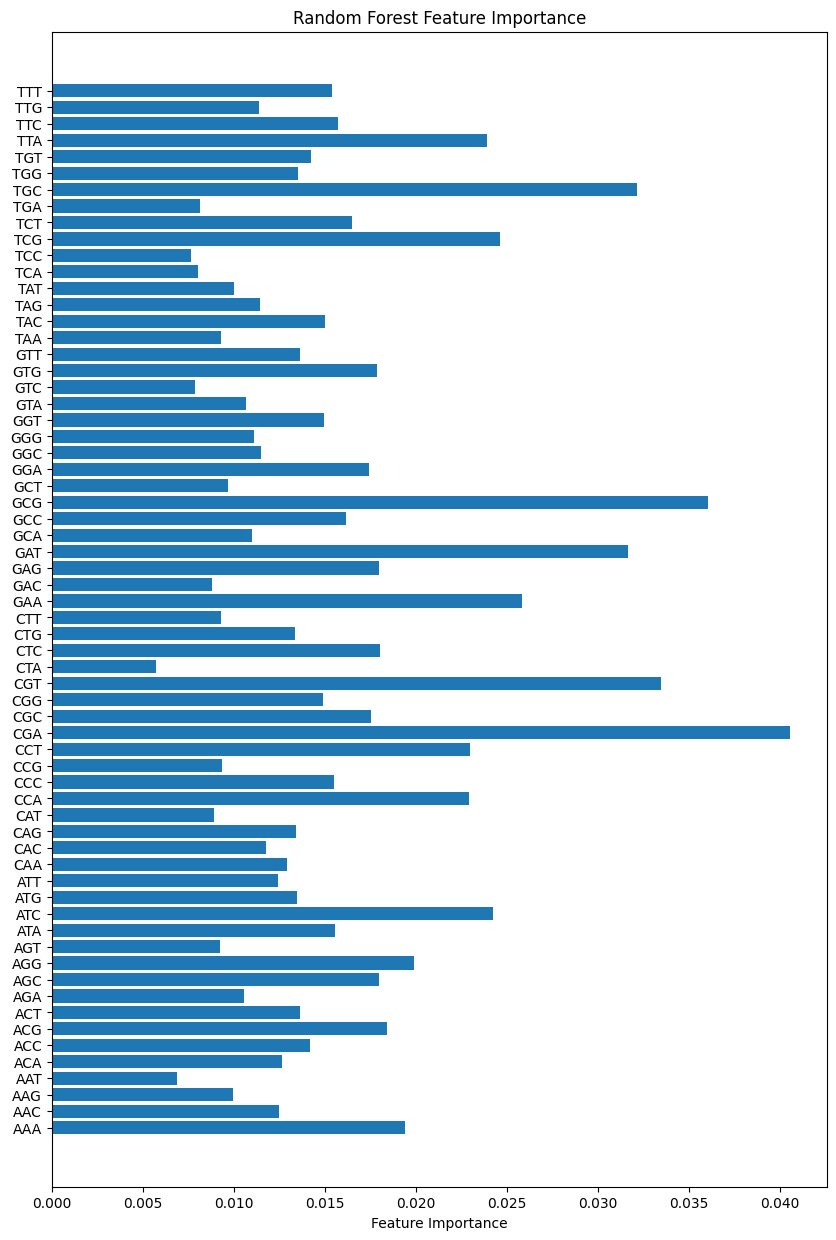

In [3]:
feature_names = X_test.columns

plt.figure(figsize=(10, 15))

plt.barh(range(len(feature_names)), feature_importance, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

plt.show()